In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [1]:
! mkdir ~/.kaggle

In [2]:
! cp /content/drive/MyDrive/Kaggle1/kaggle.json ~/.kaggle/

cp: cannot stat '/content/drive/MyDrive/Kaggle1/kaggle.json': No such file or directory


In [3]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
! kaggle datasets download ealaxi/paysim1

Dataset URL: https://www.kaggle.com/datasets/ealaxi/paysim1
License(s): CC-BY-SA-4.0
 96% 170M/178M [00:01<00:00, 119MB/s]
100% 178M/178M [00:01<00:00, 101MB/s]


In [5]:
! unzip paysim1.zip

Archive:  paysim1.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [6]:
import pandas as pd

In [7]:
df=pd.read_csv("PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.drop(columns=['nameOrig','nameDest'],inplace=True)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [9]:
df.isnull().sum()

,0
step,0
type,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0
isFlaggedFraud,0


In [10]:
df['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


In [11]:
df['type'].value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


In [12]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[['DEBIT','TRANSFER','CASH_IN','PAYMENT','CASH_OUT']])
df['type']=oe.fit_transform(df[['type']])

In [13]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3.0,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3.0,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,1.0,181.00,181.0,0.00,0.0,0.0,1,0
3,1,4.0,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3.0,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [14]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [15]:
df.duplicated().sum()


543

In [16]:
df.drop_duplicates(inplace=True)
df.shape

(6362077, 9)

In [17]:
df.tail()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,4.0,339682.13,339682.13,0.0,0.00,339682.13,1,0
6362616,743,1.0,6311409.28,6311409.28,0.0,0.00,0.00,1,0
6362617,743,4.0,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0
6362618,743,1.0,850002.52,850002.52,0.0,0.00,0.00,1,0
6362619,743,4.0,850002.52,850002.52,0.0,6510099.11,7360101.63,1,0


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['isFraud']),df['isFraud'],test_size=0.2,random_state=1)

In [19]:
x_train.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
1374686,138,3.0,21366.68,11336.00,0.00,0.00,0.00,0
3461124,257,4.0,18178.24,47114.00,28935.76,932460.23,950638.48,0
1940023,177,4.0,444468.95,26873.00,0.00,96302.67,540771.62,0
3615699,273,4.0,180296.06,0.00,0.00,2524982.52,2705278.58,0
679247,36,2.0,62148.79,335985.92,398134.71,200936.66,138787.88,0


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
l=LogisticRegression()
l.fit(x_train,y_train)
y_pred=l.predict(x_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9986450972009154

In [21]:
ps=precision_score(y_test,y_pred)
rs=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print(ps,rs,f1)

0.4997232982844494 0.5240858966918166 0.511614730878187


In [22]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.9996691333651887

In [23]:
ps=precision_score(y_test,y_pred)
rs=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print(ps,rs,f1)

0.8893540669856459 0.8630295995356936 0.8759941089837997


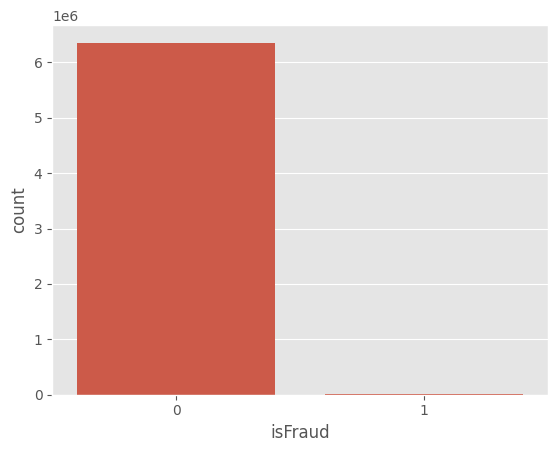

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.countplot(x='isFraud',data=df)
plt.show()

In [25]:
#the dataset is highly imbalanced but still the accuracy is 99.84%
#to balance the dataset we will use SMOTE or under sampling

In [26]:
legit=df[df.isFraud==0]
fraud=df[df.isFraud==1]

In [27]:
legit.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3.0,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3.0,1864.28,21249.0,19384.72,0.0,0.0,0,0
4,1,3.0,11668.14,41554.0,29885.86,0.0,0.0,0,0
5,1,3.0,7817.71,53860.0,46042.29,0.0,0.0,0,0
6,1,3.0,7107.77,183195.0,176087.23,0.0,0.0,0,0


In [28]:
fraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,1.0,181.0,181.0,0.0,0.0,0.0,1,0
3,1,4.0,181.0,181.0,0.0,21182.0,0.0,1,0
251,1,1.0,2806.0,2806.0,0.0,0.0,0.0,1,0
252,1,4.0,2806.0,2806.0,0.0,26202.0,0.0,1,0
680,1,1.0,20128.0,20128.0,0.0,0.0,0.0,1,0


In [29]:
legit.amount.describe().round()

,amount
count,6353880.0
mean,178211.0
std,596260.0
min,0.0
25%,13373.0
50%,74701.0
75%,208379.0
max,92445517.0


In [30]:
fraud.amount.describe().round()

,amount
count,8197.0
mean,1452533.0
std,2378653.0
min,0.0
25%,126849.0
50%,438859.0
75%,1503297.0
max,10000000.0


**Under** **Sampling**

In [41]:
fraud.shape

(8197, 9)

In [43]:
legit_us=legit.sample(n=8197,random_state=42)
legit_us.shape

(8197, 9)

In [46]:
new_df=pd.concat([legit_us,fraud],ignore_index=True)
new_df['isFraud'].value_counts()

,count
isFraud,
0,8197
1,8197


In [47]:
x_train_us,x_test_us,y_train_us,y_test_us=train_test_split(new_df.drop(columns=['isFraud']),new_df['isFraud'],test_size=0.2,random_state=1)


In [51]:
l_us=LogisticRegression()
l_us.fit(x_train_us,y_train_us)
y_pred_us=l_us.predict(x_test_us)
accuracy_score(y_test_us,y_pred_us)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9121683440073193

In [52]:
ps=precision_score(y_test_us,y_pred_us)
rs=recall_score(y_test_us,y_pred_us)
f1=f1_score(y_test_us,y_pred_us)
print(ps,rs,f1)

0.9188370684433677 0.9078396169958108 0.9133052378085491


**SMOTE**

In [53]:
legit.shape

(6353880, 9)

In [54]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)

In [61]:
x_smote,y_smote=smote.fit_resample(df.drop(columns=['isFraud']),df['isFraud'])

In [62]:
x_train_sm,x_test_sm,y_train_sm,y_test_sm=train_test_split(x_smote,y_smote,test_size=0.2,random_state=1)

In [64]:
l_sm=LogisticRegression()
l_sm.fit(x_smote,y_smote)
y_pred_sm=l_sm.predict(x_test_sm)
accuracy_score(y_test_sm,y_pred_sm)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9066298859909221

In [65]:
ps=precision_score(y_test_sm,y_pred_sm)
rs=recall_score(y_test_sm,y_pred_sm)
f1=f1_score(y_test_sm,y_pred_sm)
print(ps,rs,f1)

0.9127975332902846 0.8993005915168215 0.9059987981726203


In [66]:
l_sm.score(x_test_sm,y_test_sm)

0.9066298859909221

In [68]:
l_sm.predict(df.drop(columns=['isFraud']).head())

array([0, 0, 1, 1, 1])

In [69]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3.0,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3.0,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,1.0,181.00,181.0,0.00,0.0,0.0,1,0
3,1,4.0,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3.0,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [75]:
model_test={
    'step':[1,1,1,1],
    'type':[3.0,3.0,1.0,4.0],
    'amount':[9700.00,1850.23,189.59,11700.49],
    'oldbalanceOrg':[184912.00,25000.00,191.59,65949.87],
    'newbalanceOrig':[175212.00,23149.77,2.00,54249.38],
    'oldbalanceDest':[0.00,0.00,24924.00,0.00],
    'newbalanceDest':[9700.00,0.00,157.36,0.00],
    'isFraud':[1,0,0,0],
    'isFlaggedFraud':[0,0,0,0]

}

In [76]:
model_test_df=pd.DataFrame(model_test)

In [85]:
pred=l_sm.predict(model_test_df.drop(columns=['isFraud']))
l_sm.predict(model_test_df.drop(columns=['isFraud']))

array([0, 0, 1, 1])

In [82]:
import numpy as np

In [83]:
np.mean(pred==model_test_df['isFraud'])

0.25